In [28]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier, plot_importance
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score

- Submission_1 : Single XGB with random state 0 with SMOTE
- Submission_2 : Combination of 5 XGB and 5 Random Forest with Random state 0 with SMOTE
- Submission_3 : Combination of 5 Random Forest with Random state 0 with SMOTE
- Submission_4 : Submission 3 with Annual Income Dropped
- Submission_5 : Submission 2 with Annual Income Dropped

In [29]:
train = pd.read_csv('TrainingData.csv')
test = pd.read_csv('testX.csv')

df = pd.concat([train, test], axis = 0)

df.shape

/tmp/ipykernel_70905/1837120322.py:1: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv('TrainingData.csv')
/tmp/ipykernel_70905/1837120322.py:2: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  test = pd.read_csv('testX.csv')


(130000, 53)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 130000 entries, 0 to 46999
Data columns (total 53 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   application_key  130000 non-null  int64  
 1   mvar1            130000 non-null  object 
 2   mvar2            120787 non-null  float64
 3   mvar3            129171 non-null  float64
 4   mvar4            129171 non-null  float64
 5   mvar5            129171 non-null  float64
 6   mvar6            130000 non-null  object 
 7   mvar7            130000 non-null  object 
 8   mvar8            130000 non-null  object 
 9   mvar9            130000 non-null  object 
 10  mvar10           130000 non-null  object 
 11  mvar11           130000 non-null  object 
 12  mvar12           130000 non-null  object 
 13  mvar13           130000 non-null  object 
 14  mvar14           130000 non-null  int64  
 15  mvar15           130000 non-null  object 
 16  mvar16           130000 non-null  objec

In [31]:
columns = ['ID',
           'Credit Worthiness Score',
           'Number and Riskiness of Credit Enquiry',
           'Default Severity (Any Loan)',
           'Default Severity (Auto Loan)',
           'Default Severity (Education Loan)',
           'Min Cred Available (Revolving Credit Cards)',
           'Max Cred Available (Active Credit Lines)',
           'Max Cred Available (Active Revolving Credit Cards)',
           'Total Available Credit (Cards with 1 missed payment)',
           'Total Credit Available',
           'Dues Collected Post Default',
           'Total Amount Due (Active Cards)',
           'Credit Amount Paid (Prev Year)',
           'Annual Income',
           'Property Value',
           'Full Credit Utilisation (Revolving Credit Cards)',
           'Full Credit Utilisation (Credit Cards)',
           'Full Credit Utilisation (Credit Lines)',
           '>75 percent Credit Utilisation (Credit Cards)',
           '>75 percent Credit Utilisation (Credit Lines)',
           'Average Utilisation (Revolving Credit Cards)',
           'Average Utilisation Last 2 Years (All Credit Lines)',
           'Average Utilisation Last Year (All Credit Cards)',
           'Average Utilisation Last 6 Months with 1 Missed Payment (Credit Cards)',
           'Average Tenure (Active Revolving Credit Cards)',
           'Tenure of Oldest Active Credit Card',
           'Tenure of Oldest Active Revolving Credit Card',
           'Days Since Last Missed Payment',
           'Tenure of Oldest Credit Line',
           'Max Tenure (Auto Loans)',
           'Max Tenure (Education Loans)',
           'Sum of Tenures (Active Credit Cards)',
           'Stay Duration of Current Residence',
           'Credit Lines with 1 Missed Payment (Last 6 Months)',
           'Revolving Credit Cards with 1 Missed Payment (Last 2 Years)',
           'Active Credit Lines',
           'Credit Cards with >2Y Tenure',
           'Credit Lines activated Prev 2 Years',
           'Credit Lines with Current Delinquency',
           'Utilization on Active Education Loans',
           'Utilization on Active Auto Loans',
           'Financial Stress Index',
           'Credit Lines with No Missed Payments (Prev 2 Years)',
           'Ratio(Max Amount Due : Sum of Amounts Due)',
           'Mortgage Loans (With 2 Missed Payements)',
           'Auto Loans (With 2 Missed Payments)',
           'Type of Product',
           'Int Value for an Application',
           'Bucketized Credit Worthiness Score',
           'Compound of mvar49 and mvar48',
           'mvar51',
           'default_ind']

In [32]:
df.columns = columns

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 130000 entries, 0 to 46999
Data columns (total 53 columns):
 #   Column                                                                  Non-Null Count   Dtype  
---  ------                                                                  --------------   -----  
 0   ID                                                                      130000 non-null  int64  
 1   Credit Worthiness Score                                                 130000 non-null  object 
 2   Number and Riskiness of Credit Enquiry                                  120787 non-null  float64
 3   Default Severity (Any Loan)                                             129171 non-null  float64
 4   Default Severity (Auto Loan)                                            129171 non-null  float64
 5   Default Severity (Education Loan)                                       129171 non-null  float64
 6   Min Cred Available (Revolving Credit Cards)                          

### Feature Understanding (Explanations and Stuff to Look into)

- Auto Loans: Loans where Vehicles are kept as collateral
- Revolving Credit: You have a fixed amount that you can borrow in some fixed time frame. After that the amount you can borrow replenishes to the full amount. Although you will have a maximum limit. For example, you can borrow 100 rupees a month max and the overall limit on that credit line is 500 rupees. So if your overall borrowed amount is 460 rupees and for that month you havenn't borrowed anything so far, you will be able to borrow only 40 rupees even though the monthly limit is 100
- Difference between Credit Worthiness Score and its bucketized version?
- Difference in statistics between train and test (Need for Adverserial Validation?)

### Feature Ideas and Experiments
- Binary Variable for checking if the person has moved into current residence after issuing any credit lines
- Credit Amount Paid / Number of Credit Lines with No Missed Payments
- Max Cred Available vs Default Severity
- Separate modeling for 0 Default Severity vs Non-Zero Default Severity
- KNN Missing Values Fill In
- Property Value vs Annual Income (Some Indicator of whether or not a person spends too much for their Income)
- 75% utilisation / Full Utilisation

In [34]:
df.head(10)

,ID,Credit Worthiness Score,Number and Riskiness of Credit Enquiry,Default Severity (Any Loan),Default Severity (Auto Loan),Default Severity (Education Loan),Min Cred Available (Revolving Credit Cards),Max Cred Available (Active Credit Lines),Max Cred Available (Active Revolving Credit Cards),Total Available Credit (Cards with 1 missed payment),Total Credit Available,Dues Collected Post Default,Total Amount Due (Active Cards),Credit Amount Paid (Prev Year),Annual Income,Property Value,Full Credit Utilisation (Revolving Credit Cards),Full Credit Utilisation (Credit Cards),Full Credit Utilisation (Credit Lines),>75 percent Credit Utilisation (Credit Cards),>75 percent Credit Utilisation (Credit Lines),Average Utilisation (Revolving Credit Cards),Average Utilisation Last 2 Years (All Credit Lines),Average Utilisation Last Year (All Credit Cards),Average Utilisation Last 6 Months with 1 Missed Payment (Credit Cards),Average Tenure (Active Revolving Credit Cards),Tenure of Oldest Active Credit Card,Tenure of Oldest Active Revolving Credit Card,Days Since Last Missed Payment,Tenure of Oldest Credit Line,Max Tenure (Auto Loans),Max Tenure (Education Loans),Sum of Tenures (Active Credit Cards),Stay Duration of Current Residence,Credit Lines with 1 Missed Payment (Last 6 Months),Revolving Credit Cards with 1 Missed Payment (Last 2 Years),Active Credit Lines,Credit Cards with >2Y Tenure,Credit Lines activated Prev 2 Years,Credit Lines with Current Delinquency,Utilization on Active Education Loans,Utilization on Active Auto Loans,Financial Stress Index,Credit Lines with No Missed Payments (Prev 2 Years),Ratio(Max Amount Due : Sum of Amounts Due),Mortgage Loans (With 2 Missed Payements),Auto Loans (With 2 Missed Payments),Type of Product,Int Value for an Application,Bucketized Credit Worthiness Score,Compound of mvar49 and mvar48,mvar51,default_ind
0,230032,1696,1.6541,0.000,0.0,0.0,0,6015,322,40369,18414,missing,6423,3067,123875,missing,1,1,1,3,3,94.78,8987.18,NaN,72.25,1462,4532,2890,61,4532,1095,3376,625,1.1667,1,0,8,10,4,1,73.78,82.547,0.08696,10,0.63899,na,0,C,10,770,4,3080,0.0
1,230033,1846,0.8095,0.000,0.0,0.0,102,7532,3171,18234,13664,missing,765,1931,42613,missing,0,0,0,0,0,74.25,953.06,953.06,4.80,1028,2099,2099,30386,2281,missing,2251,169,0.4167,0,0,8,0,2,0,99.129,missing,0,13,0.63836,na,na,L,732,437,5,2185,1.0
2,230034,1745,0.4001,0.000,0.0,0.0,missing,2536,missing,missing,2536,missing,missing,missing,76109,missing,na,na,na,0,0,NaN,NaN,NaN,NaN,missing,missing,missing,669,4623,3772,missing,missing,25.0833,0,na,1,na,1,0,missing,29.29,0,1,1.00000,na,0,C,89,795,4,3180,1.0
3,230035,1739,0.2193,0.000,0.0,0.0,1982,26440,4955,20316,37013,missing,0,0,84235,missing,0,0,0,0,0,NaN,0.00,NaN,0.00,1308,2525,791,91,5992,missing,3741,215,10.3333,0,0,3,3,2,0,96.272,missing,0.15385,3,0.53241,0,0,L,3,755,4,3020,0.0
4,230036,1787,0.0118,0.225,0.0,0.0,5451,5494,5494,7987,4696,missing,2257,27815,123875,524848,0,0,0,0,0,20.51,796.67,NaN,28.72,801,2281,2281,487,2707,missing,1947,158,0.9167,0,0,2,3,2,0,115.019,missing,0,1,0.92665,na,na,L,5,425,4,1700,0.0
5,230037,1579,NaN,3.502,0.0,0.0,missing,missing,missing,missing,0,199,missing,missing,77298,missing,na,na,na,0,0,NaN,NaN,NaN,NaN,missing,missing,missing,183,973,missing,missing,missing,1.3333,0,na,2,na,2,na,missing,missing,1.5,0,NaN,na,na,C,35,455,4,1820,1.0
6,230038,1818,0.4001,0.000,0.0,0.0,missing,1088,missing,1536,1498,missing,448,2331,123875,missing,na,0,0,0,0,NaN,NaN,NaN,29.16,1034,760,missing,30386,3437,missing,791,34,9.3333,0,na,2,0,0,0,88.171,missing,0,2,0.87224,na,0,C,2,392,5,1960,1.0
7,230039,na,NaN,NaN,NaN,NaN,missing,missing,missing,missing,missing,missing,missing,missing,198200,1263525,na,na,na,0,na,NaN,NaN,NaN,NaN,missing,missing,missing,missing,missing,missing,missing,missing,0.0833,na,na,na,na,na,na,missing,missing,missing,na,NaN,na,na,C,2,615,#VALUE!,#VALUE!,0.0
8,230040,1836,0.1358,0.000,0.0,0.0,347,38964,17828,70729,65843,missing,16298,18877,109010,missing,0,0,0,1,1,32.02,0.00,0.00,

In [35]:
df.replace('missing', np.nan, inplace = True)
df.replace('na', np.nan, inplace = True)
df.replace('#VALUE!', np.nan, inplace = True)

In [36]:
df.head(10)

,ID,Credit Worthiness Score,Number and Riskiness of Credit Enquiry,Default Severity (Any Loan),Default Severity (Auto Loan),Default Severity (Education Loan),Min Cred Available (Revolving Credit Cards),Max Cred Available (Active Credit Lines),Max Cred Available (Active Revolving Credit Cards),Total Available Credit (Cards with 1 missed payment),Total Credit Available,Dues Collected Post Default,Total Amount Due (Active Cards),Credit Amount Paid (Prev Year),Annual Income,Property Value,Full Credit Utilisation (Revolving Credit Cards),Full Credit Utilisation (Credit Cards),Full Credit Utilisation (Credit Lines),>75 percent Credit Utilisation (Credit Cards),>75 percent Credit Utilisation (Credit Lines),Average Utilisation (Revolving Credit Cards),Average Utilisation Last 2 Years (All Credit Lines),Average Utilisation Last Year (All Credit Cards),Average Utilisation Last 6 Months with 1 Missed Payment (Credit Cards),Average Tenure (Active Revolving Credit Cards),Tenure of Oldest Active Credit Card,Tenure of Oldest Active Revolving Credit Card,Days Since Last Missed Payment,Tenure of Oldest Credit Line,Max Tenure (Auto Loans),Max Tenure (Education Loans),Sum of Tenures (Active Credit Cards),Stay Duration of Current Residence,Credit Lines with 1 Missed Payment (Last 6 Months),Revolving Credit Cards with 1 Missed Payment (Last 2 Years),Active Credit Lines,Credit Cards with >2Y Tenure,Credit Lines activated Prev 2 Years,Credit Lines with Current Delinquency,Utilization on Active Education Loans,Utilization on Active Auto Loans,Financial Stress Index,Credit Lines with No Missed Payments (Prev 2 Years),Ratio(Max Amount Due : Sum of Amounts Due),Mortgage Loans (With 2 Missed Payements),Auto Loans (With 2 Missed Payments),Type of Product,Int Value for an Application,Bucketized Credit Worthiness Score,Compound of mvar49 and mvar48,mvar51,default_ind
0,230032,1696,1.6541,0.000,0.0,0.0,0,6015,322,40369,18414,NaN,6423,3067,123875,NaN,1,1,1,3,3,94.78,8987.18,NaN,72.25,1462,4532,2890,61,4532,1095,3376,625,1.1667,1,0,8,10,4,1,73.78,82.547,0.08696,10,0.63899,NaN,0,C,10,770,4,3080,0.0
1,230033,1846,0.8095,0.000,0.0,0.0,102,7532,3171,18234,13664,NaN,765,1931,42613,NaN,0,0,0,0,0,74.25,953.06,953.06,4.80,1028,2099,2099,30386,2281,NaN,2251,169,0.4167,0,0,8,0,2,0,99.129,NaN,0,13,0.63836,NaN,NaN,L,732,437,5,2185,1.0
2,230034,1745,0.4001,0.000,0.0,0.0,NaN,2536,NaN,NaN,2536,NaN,NaN,NaN,76109,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,669,4623,3772,NaN,NaN,25.0833,0,NaN,1,NaN,1,0,NaN,29.29,0,1,1.00000,NaN,0,C,89,795,4,3180,1.0
3,230035,1739,0.2193,0.000,0.0,0.0,1982,26440,4955,20316,37013,NaN,0,0,84235,NaN,0,0,0,0,0,NaN,0.00,NaN,0.00,1308,2525,791,91,5992,NaN,3741,215,10.3333,0,0,3,3,2,0,96.272,NaN,0.15385,3,0.53241,0,0,L,3,755,4,3020,0.0
4,230036,1787,0.0118,0.225,0.0,0.0,5451,5494,5494,7987,4696,NaN,2257,27815,123875,524848,0,0,0,0,0,20.51,796.67,NaN,28.72,801,2281,2281,487,2707,NaN,1947,158,0.9167,0,0,2,3,2,0,115.019,NaN,0,1,0.92665,NaN,NaN,L,5,425,4,1700,0.0
5,230037,1579,NaN,3.502,0.0,0.0,NaN,NaN,NaN,NaN,0,199,NaN,NaN,77298,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,183,973,NaN,NaN,NaN,1.3333,0,NaN,2,NaN,2,NaN,NaN,NaN,1.5,0,NaN,NaN,NaN,C,35,455,4,1820,1.0
6,230038,1818,0.4001,0.000,0.0,0.0,NaN,1088,NaN,1536,1498,NaN,448,2331,123875,NaN,NaN,0,0,0,0,NaN,NaN,NaN,29.16,1034,760,NaN,30386,3437,NaN,791,34,9.3333,0,NaN,2,0,0,0,88.171,NaN,0,2,0.87224,NaN,0,C,2,392,5,1960,1.0
7,230039,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,198200,1263525,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0833,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,2,615,NaN,NaN,0.0
8,230040,1836,0.1358,0.000,0.0,0.0,347,38964,17828,70729,65843,NaN,16298,18877,109010,NaN,0,0,0,1,1,32.02,0.00,0.00,32.92,3180,8943,8943,1490,12075,NaN,NaN,1673,5.9167,0,NaN,6,12,2,0,NaN,NaN,0,10,0.89868,0,0,L,5,821,5,4105,1.0
9,230041,1839,0.1981,0.000,0.0,0.0,793,6131,6045,48959,31640,NaN,10565,14282,99100,146668,0,0,0,1,1,46.17,NaN,NaN,49.07,1701,8912,2707,61

In [37]:
df.reset_index(drop = True, inplace = True)

In [38]:
df.fillna(-1, inplace = True)

In [39]:
def convert_to_int(entry):
    return float(entry)

for col in df.columns:
    if col != 'Type of Product':
        df[col] = df[col].apply(convert_to_int)
    
df['Credit Worthiness Score'][0]

1696.0

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130000 entries, 0 to 129999
Data columns (total 53 columns):
 #   Column                                                                  Non-Null Count   Dtype  
---  ------                                                                  --------------   -----  
 0   ID                                                                      130000 non-null  float64
 1   Credit Worthiness Score                                                 130000 non-null  float64
 2   Number and Riskiness of Credit Enquiry                                  130000 non-null  float64
 3   Default Severity (Any Loan)                                             130000 non-null  float64
 4   Default Severity (Auto Loan)                                            130000 non-null  float64
 5   Default Severity (Education Loan)                                       130000 non-null  float64
 6   Min Cred Available (Revolving Credit Cards)                         

In [41]:
df['default_ind'].value_counts()

 0.0    59145
-1.0    47000
 1.0    23855
Name: default_ind, dtype: int64

In [42]:
le = LabelEncoder()
df['Type of Product'] = le.fit_transform(df['Type of Product'])

In [43]:
import re
df = df.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

In [44]:
train = df.iloc[:83000, :]

X_data = train.drop(['ID', 'default_ind', 'AnnualIncome'], axis = 1)
y_data = train['default_ind']

In [45]:
kfold = StratifiedKFold(random_state = 0, n_splits = 5, shuffle = True)
splits = kfold.split(X_data, y_data)

sm = SMOTE(random_state = 10, k_neighbors = 3, n_jobs = -1)

xgb_acc_scores = []
xgb_f1_scores = []
xgb_models = []

rf_acc_scores = []
rf_f1_scores = []
rf_models = []

for Train, Test in splits:
    X_Train, X_Test, Y_Train, Y_Test = X_data.iloc[Train], X_data.iloc[Test], y_data.iloc[Train], y_data.iloc[Test]
    
    xgb = XGBClassifier(n_estimators = 2000, max_depth = 8, n_jobs = -1, reg_lambda = 0.1,
                        learning_rate = 0.05, random_state = 0, early_stopping_rounds = 200)
    
    rf = RandomForestClassifier(n_estimators = 150, max_depth=8, n_jobs=-1, random_state=0)
    
    X_Train, Y_Train = sm.fit_resample(X_Train, Y_Train)
    
    xgb.fit(X_Train, Y_Train, eval_set = [(X_Train, Y_Train), (X_Test, Y_Test)], verbose = True)
    
    pred = xgb.predict(X_Test)
    
    xgb_f1_scores.append(f1_score(Y_Test, pred))
    xgb_acc_scores.append(accuracy_score(Y_Test, pred)*100)
    xgb_models.append(xgb)
    
    rf.fit(X_Train, Y_Train)
    
    pred = rf.predict(X_Test)
    
    rf_f1_scores.append(f1_score(Y_Test, pred))
    rf_acc_scores.append(accuracy_score(Y_Test, pred)*100)
    rf_models.append(rf)

[0]	validation_0-logloss:0.67322	validation_1-logloss:0.67836
[1]	validation_0-logloss:0.65439	validation_1-logloss:0.66496
[2]	validation_0-logloss:0.63769	validation_1-logloss:0.65270
[3]	validation_0-logloss:0.62202	validation_1-logloss:0.64169
[4]	validation_0-logloss:0.60765	validation_1-logloss:0.63157
[5]	validation_0-logloss:0.59431	validation_1-logloss:0.62212
[6]	validation_0-logloss:0.58178	validation_1-logloss:0.61347
[7]	validation_0-logloss:0.57030	validation_1-logloss:0.60544
[8]	validation_0-logloss:0.55956	validation_1-logloss:0.59815
[9]	validation_0-logloss:0.54932	validation_1-logloss:0.59123
[10]	validation_0-logloss:0.53978	validation_1-logloss:0.58476
[11]	validation_0-logloss:0.53119	validation_1-logloss:0.57912
[12]	validation_0-logloss:0.52286	validation_1-logloss:0.57361
[13]	validation_0-logloss:0.51502	validation_1-logloss:0.56872
[14]	validation_0-logloss:0.50740	validation_1-logloss:0.56391
[15]	validation_0-logloss:0.50047	validation_1-logloss:0.55962
[1

[130]	validation_0-logloss:0.30997	validation_1-logloss:0.48485
[131]	validation_0-logloss:0.30956	validation_1-logloss:0.48496
[132]	validation_0-logloss:0.30913	validation_1-logloss:0.48490
[133]	validation_0-logloss:0.30863	validation_1-logloss:0.48494
[134]	validation_0-logloss:0.30818	validation_1-logloss:0.48482
[135]	validation_0-logloss:0.30775	validation_1-logloss:0.48474
[136]	validation_0-logloss:0.30731	validation_1-logloss:0.48475
[137]	validation_0-logloss:0.30695	validation_1-logloss:0.48479
[138]	validation_0-logloss:0.30670	validation_1-logloss:0.48473
[139]	validation_0-logloss:0.30622	validation_1-logloss:0.48465
[140]	validation_0-logloss:0.30598	validation_1-logloss:0.48469
[141]	validation_0-logloss:0.30561	validation_1-logloss:0.48465
[142]	validation_0-logloss:0.30526	validation_1-logloss:0.48461
[143]	validation_0-logloss:0.30482	validation_1-logloss:0.48455
[144]	validation_0-logloss:0.30440	validation_1-logloss:0.48455
[145]	validation_0-logloss:0.30393	valid

[259]	validation_0-logloss:0.27422	validation_1-logloss:0.48520
[260]	validation_0-logloss:0.27394	validation_1-logloss:0.48518
[261]	validation_0-logloss:0.27384	validation_1-logloss:0.48521
[262]	validation_0-logloss:0.27379	validation_1-logloss:0.48520
[263]	validation_0-logloss:0.27360	validation_1-logloss:0.48524
[264]	validation_0-logloss:0.27330	validation_1-logloss:0.48529
[265]	validation_0-logloss:0.27319	validation_1-logloss:0.48529
[266]	validation_0-logloss:0.27288	validation_1-logloss:0.48528
[267]	validation_0-logloss:0.27259	validation_1-logloss:0.48526
[268]	validation_0-logloss:0.27242	validation_1-logloss:0.48526
[269]	validation_0-logloss:0.27212	validation_1-logloss:0.48529
[270]	validation_0-logloss:0.27187	validation_1-logloss:0.48531
[271]	validation_0-logloss:0.27173	validation_1-logloss:0.48533
[272]	validation_0-logloss:0.27144	validation_1-logloss:0.48532
[273]	validation_0-logloss:0.27126	validation_1-logloss:0.48537
[274]	validation_0-logloss:0.27100	valid

[4]	validation_0-logloss:0.60726	validation_1-logloss:0.63079
[5]	validation_0-logloss:0.59407	validation_1-logloss:0.62138
[6]	validation_0-logloss:0.58181	validation_1-logloss:0.61287
[7]	validation_0-logloss:0.57030	validation_1-logloss:0.60474
[8]	validation_0-logloss:0.55977	validation_1-logloss:0.59762
[9]	validation_0-logloss:0.54976	validation_1-logloss:0.59076
[10]	validation_0-logloss:0.54062	validation_1-logloss:0.58462
[11]	validation_0-logloss:0.53166	validation_1-logloss:0.57863
[12]	validation_0-logloss:0.52327	validation_1-logloss:0.57317
[13]	validation_0-logloss:0.51507	validation_1-logloss:0.56803
[14]	validation_0-logloss:0.50756	validation_1-logloss:0.56325
[15]	validation_0-logloss:0.50071	validation_1-logloss:0.55883
[16]	validation_0-logloss:0.49401	validation_1-logloss:0.55475
[17]	validation_0-logloss:0.48747	validation_1-logloss:0.55063
[18]	validation_0-logloss:0.48131	validation_1-logloss:0.54702
[19]	validation_0-logloss:0.47566	validation_1-logloss:0.5437

[134]	validation_0-logloss:0.31114	validation_1-logloss:0.48027
[135]	validation_0-logloss:0.31071	validation_1-logloss:0.48022
[136]	validation_0-logloss:0.31002	validation_1-logloss:0.48020
[137]	validation_0-logloss:0.30956	validation_1-logloss:0.48017
[138]	validation_0-logloss:0.30922	validation_1-logloss:0.48015
[139]	validation_0-logloss:0.30881	validation_1-logloss:0.48019
[140]	validation_0-logloss:0.30846	validation_1-logloss:0.48015
[141]	validation_0-logloss:0.30796	validation_1-logloss:0.48004
[142]	validation_0-logloss:0.30754	validation_1-logloss:0.48004
[143]	validation_0-logloss:0.30709	validation_1-logloss:0.47996
[144]	validation_0-logloss:0.30664	validation_1-logloss:0.47988
[145]	validation_0-logloss:0.30618	validation_1-logloss:0.47991
[146]	validation_0-logloss:0.30585	validation_1-logloss:0.47991
[147]	validation_0-logloss:0.30533	validation_1-logloss:0.47989
[148]	validation_0-logloss:0.30488	validation_1-logloss:0.47990
[149]	validation_0-logloss:0.30439	valid

[263]	validation_0-logloss:0.27358	validation_1-logloss:0.48005
[264]	validation_0-logloss:0.27337	validation_1-logloss:0.48004
[265]	validation_0-logloss:0.27307	validation_1-logloss:0.48009
[266]	validation_0-logloss:0.27286	validation_1-logloss:0.48012
[267]	validation_0-logloss:0.27256	validation_1-logloss:0.48018
[268]	validation_0-logloss:0.27237	validation_1-logloss:0.48019
[269]	validation_0-logloss:0.27200	validation_1-logloss:0.48022
[270]	validation_0-logloss:0.27166	validation_1-logloss:0.48023
[271]	validation_0-logloss:0.27149	validation_1-logloss:0.48026
[272]	validation_0-logloss:0.27122	validation_1-logloss:0.48026
[273]	validation_0-logloss:0.27088	validation_1-logloss:0.48022
[274]	validation_0-logloss:0.27075	validation_1-logloss:0.48021
[275]	validation_0-logloss:0.27041	validation_1-logloss:0.48024
[276]	validation_0-logloss:0.27013	validation_1-logloss:0.48022
[277]	validation_0-logloss:0.26994	validation_1-logloss:0.48022
[278]	validation_0-logloss:0.26970	valid

[13]	validation_0-logloss:0.51390	validation_1-logloss:0.57137
[14]	validation_0-logloss:0.50650	validation_1-logloss:0.56683
[15]	validation_0-logloss:0.49976	validation_1-logloss:0.56267
[16]	validation_0-logloss:0.49315	validation_1-logloss:0.55865
[17]	validation_0-logloss:0.48700	validation_1-logloss:0.55507
[18]	validation_0-logloss:0.48123	validation_1-logloss:0.55173
[19]	validation_0-logloss:0.47541	validation_1-logloss:0.54844
[20]	validation_0-logloss:0.47007	validation_1-logloss:0.54538
[21]	validation_0-logloss:0.46463	validation_1-logloss:0.54248
[22]	validation_0-logloss:0.45972	validation_1-logloss:0.53981
[23]	validation_0-logloss:0.45480	validation_1-logloss:0.53723
[24]	validation_0-logloss:0.45069	validation_1-logloss:0.53503
[25]	validation_0-logloss:0.44657	validation_1-logloss:0.53287
[26]	validation_0-logloss:0.44249	validation_1-logloss:0.53075
[27]	validation_0-logloss:0.43870	validation_1-logloss:0.52877
[28]	validation_0-logloss:0.43513	validation_1-logloss:

[143]	validation_0-logloss:0.30539	validation_1-logloss:0.49097
[144]	validation_0-logloss:0.30493	validation_1-logloss:0.49090
[145]	validation_0-logloss:0.30471	validation_1-logloss:0.49087
[146]	validation_0-logloss:0.30446	validation_1-logloss:0.49089
[147]	validation_0-logloss:0.30397	validation_1-logloss:0.49087
[148]	validation_0-logloss:0.30369	validation_1-logloss:0.49086
[149]	validation_0-logloss:0.30341	validation_1-logloss:0.49082
[150]	validation_0-logloss:0.30306	validation_1-logloss:0.49077
[151]	validation_0-logloss:0.30286	validation_1-logloss:0.49076
[152]	validation_0-logloss:0.30250	validation_1-logloss:0.49069
[153]	validation_0-logloss:0.30226	validation_1-logloss:0.49069
[154]	validation_0-logloss:0.30198	validation_1-logloss:0.49067
[155]	validation_0-logloss:0.30167	validation_1-logloss:0.49062
[156]	validation_0-logloss:0.30123	validation_1-logloss:0.49061
[157]	validation_0-logloss:0.30081	validation_1-logloss:0.49055
[158]	validation_0-logloss:0.30068	valid

[272]	validation_0-logloss:0.27252	validation_1-logloss:0.49039
[273]	validation_0-logloss:0.27243	validation_1-logloss:0.49042
[274]	validation_0-logloss:0.27210	validation_1-logloss:0.49045
[275]	validation_0-logloss:0.27203	validation_1-logloss:0.49045
[276]	validation_0-logloss:0.27172	validation_1-logloss:0.49042
[277]	validation_0-logloss:0.27148	validation_1-logloss:0.49044
[278]	validation_0-logloss:0.27136	validation_1-logloss:0.49048
[279]	validation_0-logloss:0.27103	validation_1-logloss:0.49043
[280]	validation_0-logloss:0.27063	validation_1-logloss:0.49044
[281]	validation_0-logloss:0.27058	validation_1-logloss:0.49047
[282]	validation_0-logloss:0.27036	validation_1-logloss:0.49052
[283]	validation_0-logloss:0.27007	validation_1-logloss:0.49055
[284]	validation_0-logloss:0.26997	validation_1-logloss:0.49053
[285]	validation_0-logloss:0.26984	validation_1-logloss:0.49057
[286]	validation_0-logloss:0.26972	validation_1-logloss:0.49058
[287]	validation_0-logloss:0.26957	valid

[401]	validation_0-logloss:0.24764	validation_1-logloss:0.49170
[402]	validation_0-logloss:0.24754	validation_1-logloss:0.49169
[403]	validation_0-logloss:0.24723	validation_1-logloss:0.49168
[404]	validation_0-logloss:0.24698	validation_1-logloss:0.49166
[405]	validation_0-logloss:0.24673	validation_1-logloss:0.49169
[406]	validation_0-logloss:0.24670	validation_1-logloss:0.49170
[407]	validation_0-logloss:0.24650	validation_1-logloss:0.49165
[408]	validation_0-logloss:0.24642	validation_1-logloss:0.49165
[0]	validation_0-logloss:0.67295	validation_1-logloss:0.67829
[1]	validation_0-logloss:0.65436	validation_1-logloss:0.66502
[2]	validation_0-logloss:0.63754	validation_1-logloss:0.65303
[3]	validation_0-logloss:0.62209	validation_1-logloss:0.64184
[4]	validation_0-logloss:0.60766	validation_1-logloss:0.63182
[5]	validation_0-logloss:0.59428	validation_1-logloss:0.62230
[6]	validation_0-logloss:0.58211	validation_1-logloss:0.61393
[7]	validation_0-logloss:0.57038	validation_1-logloss:

[122]	validation_0-logloss:0.31585	validation_1-logloss:0.48507
[123]	validation_0-logloss:0.31530	validation_1-logloss:0.48494
[124]	validation_0-logloss:0.31466	validation_1-logloss:0.48493
[125]	validation_0-logloss:0.31424	validation_1-logloss:0.48486
[126]	validation_0-logloss:0.31390	validation_1-logloss:0.48485
[127]	validation_0-logloss:0.31359	validation_1-logloss:0.48479
[128]	validation_0-logloss:0.31313	validation_1-logloss:0.48482
[129]	validation_0-logloss:0.31275	validation_1-logloss:0.48481
[130]	validation_0-logloss:0.31221	validation_1-logloss:0.48474
[131]	validation_0-logloss:0.31172	validation_1-logloss:0.48471
[132]	validation_0-logloss:0.31141	validation_1-logloss:0.48473
[133]	validation_0-logloss:0.31106	validation_1-logloss:0.48470
[134]	validation_0-logloss:0.31043	validation_1-logloss:0.48460
[135]	validation_0-logloss:0.31030	validation_1-logloss:0.48461
[136]	validation_0-logloss:0.30983	validation_1-logloss:0.48454
[137]	validation_0-logloss:0.30940	valid

[251]	validation_0-logloss:0.27790	validation_1-logloss:0.48465
[252]	validation_0-logloss:0.27786	validation_1-logloss:0.48466
[253]	validation_0-logloss:0.27757	validation_1-logloss:0.48466
[254]	validation_0-logloss:0.27752	validation_1-logloss:0.48467
[255]	validation_0-logloss:0.27745	validation_1-logloss:0.48468
[256]	validation_0-logloss:0.27718	validation_1-logloss:0.48469
[257]	validation_0-logloss:0.27695	validation_1-logloss:0.48465
[258]	validation_0-logloss:0.27671	validation_1-logloss:0.48470
[259]	validation_0-logloss:0.27637	validation_1-logloss:0.48469
[260]	validation_0-logloss:0.27632	validation_1-logloss:0.48470
[261]	validation_0-logloss:0.27612	validation_1-logloss:0.48472
[262]	validation_0-logloss:0.27582	validation_1-logloss:0.48477
[263]	validation_0-logloss:0.27564	validation_1-logloss:0.48479
[264]	validation_0-logloss:0.27546	validation_1-logloss:0.48478
[265]	validation_0-logloss:0.27503	validation_1-logloss:0.48484
[266]	validation_0-logloss:0.27492	valid

[380]	validation_0-logloss:0.25135	validation_1-logloss:0.48687
[381]	validation_0-logloss:0.25099	validation_1-logloss:0.48692
[382]	validation_0-logloss:0.25097	validation_1-logloss:0.48692
[383]	validation_0-logloss:0.25091	validation_1-logloss:0.48693
[384]	validation_0-logloss:0.25070	validation_1-logloss:0.48697
[385]	validation_0-logloss:0.25061	validation_1-logloss:0.48697
[386]	validation_0-logloss:0.25058	validation_1-logloss:0.48696
[387]	validation_0-logloss:0.25051	validation_1-logloss:0.48697
[388]	validation_0-logloss:0.25048	validation_1-logloss:0.48697
[0]	validation_0-logloss:0.67308	validation_1-logloss:0.67858
[1]	validation_0-logloss:0.65430	validation_1-logloss:0.66520
[2]	validation_0-logloss:0.63733	validation_1-logloss:0.65328
[3]	validation_0-logloss:0.62164	validation_1-logloss:0.64228
[4]	validation_0-logloss:0.60741	validation_1-logloss:0.63244
[5]	validation_0-logloss:0.59393	validation_1-logloss:0.62308
[6]	validation_0-logloss:0.58127	validation_1-loglos

[121]	validation_0-logloss:0.31448	validation_1-logloss:0.48973
[122]	validation_0-logloss:0.31385	validation_1-logloss:0.48958
[123]	validation_0-logloss:0.31345	validation_1-logloss:0.48954
[124]	validation_0-logloss:0.31303	validation_1-logloss:0.48952
[125]	validation_0-logloss:0.31266	validation_1-logloss:0.48946
[126]	validation_0-logloss:0.31238	validation_1-logloss:0.48946
[127]	validation_0-logloss:0.31201	validation_1-logloss:0.48946
[128]	validation_0-logloss:0.31163	validation_1-logloss:0.48941
[129]	validation_0-logloss:0.31115	validation_1-logloss:0.48937
[130]	validation_0-logloss:0.31071	validation_1-logloss:0.48936
[131]	validation_0-logloss:0.31004	validation_1-logloss:0.48930
[132]	validation_0-logloss:0.30978	validation_1-logloss:0.48926
[133]	validation_0-logloss:0.30954	validation_1-logloss:0.48918
[134]	validation_0-logloss:0.30903	validation_1-logloss:0.48914
[135]	validation_0-logloss:0.30845	validation_1-logloss:0.48900
[136]	validation_0-logloss:0.30808	valid

[250]	validation_0-logloss:0.27728	validation_1-logloss:0.48824
[251]	validation_0-logloss:0.27708	validation_1-logloss:0.48824
[252]	validation_0-logloss:0.27705	validation_1-logloss:0.48827
[253]	validation_0-logloss:0.27695	validation_1-logloss:0.48826
[254]	validation_0-logloss:0.27664	validation_1-logloss:0.48824
[255]	validation_0-logloss:0.27639	validation_1-logloss:0.48823
[256]	validation_0-logloss:0.27628	validation_1-logloss:0.48821
[257]	validation_0-logloss:0.27615	validation_1-logloss:0.48819
[258]	validation_0-logloss:0.27566	validation_1-logloss:0.48818
[259]	validation_0-logloss:0.27547	validation_1-logloss:0.48816
[260]	validation_0-logloss:0.27536	validation_1-logloss:0.48815
[261]	validation_0-logloss:0.27531	validation_1-logloss:0.48814
[262]	validation_0-logloss:0.27528	validation_1-logloss:0.48816
[263]	validation_0-logloss:0.27502	validation_1-logloss:0.48816
[264]	validation_0-logloss:0.27477	validation_1-logloss:0.48814
[265]	validation_0-logloss:0.27467	valid

[379]	validation_0-logloss:0.25141	validation_1-logloss:0.49001
[380]	validation_0-logloss:0.25126	validation_1-logloss:0.49000
[381]	validation_0-logloss:0.25117	validation_1-logloss:0.49003
[382]	validation_0-logloss:0.25115	validation_1-logloss:0.49004
[383]	validation_0-logloss:0.25081	validation_1-logloss:0.49004
[384]	validation_0-logloss:0.25043	validation_1-logloss:0.49005
[385]	validation_0-logloss:0.25034	validation_1-logloss:0.49004
[386]	validation_0-logloss:0.25017	validation_1-logloss:0.49008
[387]	validation_0-logloss:0.25015	validation_1-logloss:0.49008
[388]	validation_0-logloss:0.24992	validation_1-logloss:0.49007
[389]	validation_0-logloss:0.24984	validation_1-logloss:0.49008
[390]	validation_0-logloss:0.24976	validation_1-logloss:0.49011
[391]	validation_0-logloss:0.24953	validation_1-logloss:0.49011
[392]	validation_0-logloss:0.24918	validation_1-logloss:0.49009
[393]	validation_0-logloss:0.24885	validation_1-logloss:0.49011
[394]	validation_0-logloss:0.24870	valid

In [46]:
print("XGB F1 Score: ", sum(xgb_f1_scores)/len(xgb_f1_scores))
print("XGB Accuracy: ", sum(xgb_acc_scores)/len(xgb_acc_scores), "%")
print("RF F1 Score: ", sum(rf_f1_scores)/len(rf_f1_scores))
print("RF Accuracy: ", sum(rf_acc_scores)/len(rf_acc_scores), "%")

XGB F1 Score:  0.5335842961740968
XGB Accuracy:  77.10722891566266 %
RF F1 Score:  0.5717794896922699
RF Accuracy:  74.2867469879518 %


<Figure size 1000x1000 with 0 Axes>

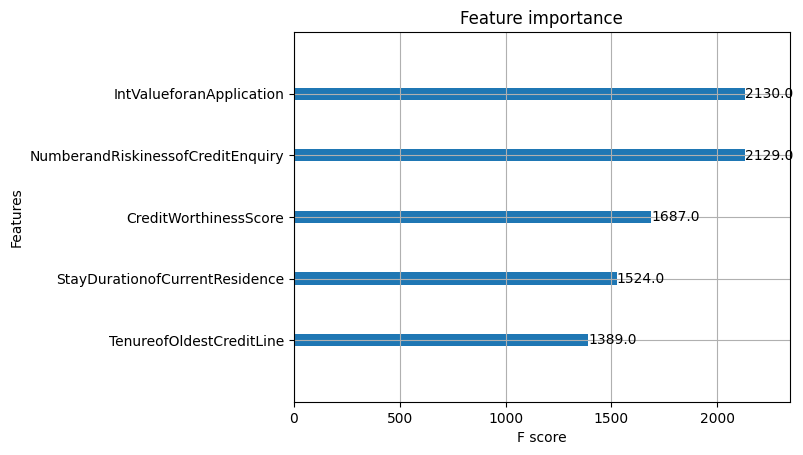

In [47]:
model = xgb_models[0]

plt.figure(figsize = (10,10))
plot_importance(model, max_num_features = 5)
plt.show()

In [48]:
test = df.iloc[83000:, :]
test = test.drop(['ID', 'default_ind', 'AnnualIncome'], axis = 1)

In [55]:
preds = np.argmax(#xgb_models[0].predict_proba(test) +
                  #xgb_models[1].predict_proba(test) +
                  #xgb_models[2].predict_proba(test) +
                  #xgb_models[3].predict_proba(test) +
                  #xgb_models[4].predict_proba(test) +
                  rf_models[0].predict_proba(test) +
                  rf_models[1].predict_proba(test) +
                  rf_models[2].predict_proba(test) +
                  rf_models[3].predict_proba(test) +
                  rf_models[4].predict_proba(test), axis = 1)

In [56]:
sample = pd.read_csv('submission.csv', header = None)
sample.head()

,0,1
0,578069,0
1,578070,1
2,578071,1
3,578072,1
4,578073,0


In [57]:
sample[1] = preds
sample.head()

,0,1
0,578069,0
1,578070,0
2,578071,0
3,578072,0
4,578073,0


In [58]:
sample[1].value_counts()

0    34808
1    12192
Name: 1, dtype: int64

In [59]:
#sample.to_csv('Submissions/ThirdDegreeBurn_5.csv', index = False, header=False)